# SDD Interpretations

Semi-Discrete Decomposition was applied to the lab data's SVD results in Matlab. Results from that process were exported to csv files and we will now visualize the results produced. 

In [8]:
import pandas as pd
import numpy as np 

### Lab SDD Visualizations

In [9]:
labSVD = pd.read_csv("C:/Users/rachh/OneDrive/Documents/Senior Thesis/sddLab_results.csv")
sddLab_approx = pd.read_csv("C:/Users/rachh/OneDrive/Documents/Senior Thesis/labSDD_approx.csv",header=None)
D = pd.read_csv("C:/Users/rachh/OneDrive/Documents/Senior Thesis/labD.csv",header = None)

In [10]:
D = D[0].tolist()

In [11]:
sdd_label_dict = {}
for index,row in labSVD.iterrows():
    entry_0 = row[0]
    entry_1 = row[1]
    entry_2 = row[2]
    
    sdd_label_dict[entry_0] = np.argmin(np.abs(np.array(D)-entry_0))
    sdd_label_dict[entry_1] = np.argmin(np.abs(np.array(D)-entry_1)) 
    sdd_label_dict[entry_2] = np.argmin(np.abs(np.array(D)-entry_2))

In [12]:
small_D = [342.5791,97.9466,72.1293,87.9923,209.0667,259.8233,42.0759]

small_sdd_label_dict = {}
for index,row in labSVD.iterrows():
    entry_0 = row[0]
    entry_1 = row[1]
    entry_2 = row[2]
    
    small_sdd_label_dict[entry_0] = np.argmin(np.abs(np.array(small_D)-entry_0))
    small_sdd_label_dict[entry_1] = np.argmin(np.abs(np.array(small_D)-entry_1)) 
    small_sdd_label_dict[entry_2] = np.argmin(np.abs(np.array(small_D)-entry_2))

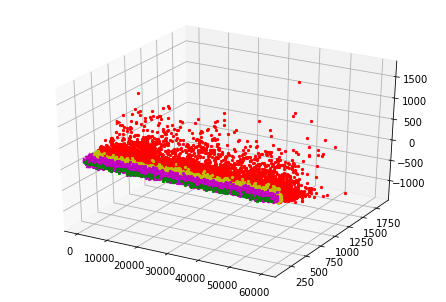

In [14]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

markers = ['.',
',',
'o',
'v',
'^',
'<',
'>',
'1',
'2',
'3',
'4',
's',
'p']
colors = ['r','g','b','c','m', 'y', 'k','w']

fig = plt.figure()
ax = Axes3D(fig)

x = labSVD['0'].tolist()
y = labSVD['1'].tolist()
z = labSVD['2'].tolist()

#ax.set_xlim3d(-300,800)
#ax.set_zlim3d(-200,800)
#ax.set_ylim3d(300,2000)


for index,row in labSVD.iterrows():
    entry_0 = row[0]
    entry_1 = row[1]
    entry_2 = row[2]
    
    entry0_index = small_sdd_label_dict.get(entry_0)
    entry1_index = small_sdd_label_dict.get(entry_1)
    entry2_index = small_sdd_label_dict.get(entry_2)
    
    m0 = markers[entry0_index]
    c1 = colors[entry1_index]
    
    color = sdd_label_dict.get(entry_1)
    ax.scatter(entry_0, entry_1, entry_2,marker=m0,color=c1,cmap="PuBuGn")

plt.show()